In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [3]:
df = pd.read_csv(r"C:\Users\DELL\Documents\youtube_likes project\USvideos.csv")

In [4]:
df2 = pd.read_json(r"C:\Users\DELL\Documents\youtube_likes project\US_category_id.json")

## Data cleaning / Preprocessing

In [5]:
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


In [6]:
df2.head(2)

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [7]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [8]:
df.drop(['description','tags','thumbnail_link'],axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   views                   40949 non-null  int64 
 7   likes                   40949 non-null  int64 
 8   dislikes                40949 non-null  int64 
 9   comment_count           40949 non-null  int64 
 10  comments_disabled       40949 non-null  bool  
 11  ratings_disabled        40949 non-null  bool  
 12  video_error_or_removed  40949 non-null  bool  
dtypes: bool(3), int64(5), object(5)
memory usage: 3.2+ MB


In [10]:
df['video_id'].nunique()

6351

In [11]:
df['video_id'].unique()

array(['2kyS6SvSYSE', '1ZAPwfrtAFY', '5qpjK5DgCt4', ..., '6h8QgZF5Qu4',
       'mpnshdmtE2Y', 'yz7Xq3T0YPs'], dtype=object)

In [12]:
df[df['video_id']=='2kyS6SvSYSE']

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,False,False,False
217,2kyS6SvSYSE,17.15.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,2188590,88099,7150,24225,False,False,False
448,2kyS6SvSYSE,17.16.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,2325233,91111,7543,21450,False,False,False
689,2kyS6SvSYSE,17.17.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,2400741,92831,7687,21714,False,False,False
924,2kyS6SvSYSE,17.18.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,2468267,94303,7802,21866,False,False,False
1159,2kyS6SvSYSE,17.19.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,2524854,95587,7892,22038,False,False,False
1383,2kyS6SvSYSE,17.20.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,2564903,96321,7972,22149,False,False,False


### Getting the maximum views, likes, dislikes, comment_count of video_id column

In [13]:
df.groupby('video_id').max().sort_values(by='views',ascending=False)

,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
video_id,,,,,,,,,,,,
VYOjWnS4cMY,18.31.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,225211923,5023450,343541,517232,False,False,False
FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,149376127,3093544,1643059,827755,False,False,False
ffxKSjUwKdU,18.30.04,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20T04:00:03.000Z,148689896,3094021,129502,242039,False,False,False
zEf423kYfqk,18.30.04,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,10,2018-04-20T10:40:51.000Z,139334502,1425496,119798,83941,False,False,False
7C2z4GqqS5E,18.31.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,123010920,5613827,206892,1228655,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
qg0GdM60syI,17.14.11,Huffy Metaloid Bicycle Commercial 1997,90s Commercials,27,2017-03-31T21:46:53.000Z,773,2,0,0,False,False,False
zeQaJGkFyqQ,18.18.01,"Raw: 3 South Carolina Deputies, 1 Officer Shot",Associated Press,25,2018-01-16T12:16:44.000Z,748,9,0,0,True,False,False
dQMZLXaa1L8,18.29.01,Artwork Forge,Palo Alto Online,17,2018-01-10T23:53:56.000Z,745,1,0,0,False,False,False


In [14]:
video = df.groupby('video_id').max().sort_values(by='views',ascending=False)

In [15]:
import datetime as dt

In [16]:
video['publish_time'] = pd.to_datetime(video['publish_time'])

In [17]:
video['year'] = video['publish_time'].dt.year

In [18]:
video['month'] = video['publish_time'].dt.month_name()

In [19]:
video['trending_date'] = pd.to_datetime(video['trending_date'], format='%y.%d.%m')

In [20]:
video.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6351 entries, VYOjWnS4cMY to y6KYFcta4SE
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   trending_date           6351 non-null   datetime64[ns]     
 1   title                   6351 non-null   object             
 2   channel_title           6351 non-null   object             
 3   category_id             6351 non-null   int64              
 4   publish_time            6351 non-null   datetime64[ns, UTC]
 5   views                   6351 non-null   int64              
 6   likes                   6351 non-null   int64              
 7   dislikes                6351 non-null   int64              
 8   comment_count           6351 non-null   int64              
 9   comments_disabled       6351 non-null   bool               
 10  ratings_disabled        6351 non-null   bool               
 11  video_error_or_removed  6351 no

### Reset index = reset_index()

In [21]:
video.reset_index(inplace=True)

In [22]:
video.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,year,month
0,VYOjWnS4cMY,2018-05-31,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06 04:00:07+00:00,225211923,5023450,343541,517232,False,False,False,2018,May
1,FlsCjmMhFmw,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06 17:58:51+00:00,149376127,3093544,1643059,827755,False,False,False,2017,December
2,ffxKSjUwKdU,2018-04-30,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20 04:00:03+00:00,148689896,3094021,129502,242039,False,False,False,2018,April


In [23]:
video['category_id']

0       10
1       24
2       10
3       10
4       10
        ..
6346    27
6347    25
6348    17
6349    17
6350    25
Name: category_id, Length: 6351, dtype: int64

In [24]:
df2

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [25]:
df2['items'][0]['snippet']['title']

'Film & Animation'

In [26]:
video['category_id'].unique()

array([10, 24, 22,  1, 26, 28, 23, 17,  2, 29, 19, 20, 25, 27, 15, 43],
      dtype=int64)

In [27]:
id = [df2['items'][i]['id']  for i in range(0,32)]

In [28]:
genre = [df2['items'][i]['snippet']['title'] for i in range(0,32)]


In [29]:
catid_genre = pd.DataFrame({"category_id":id,"genre":genre})

In [30]:
catid_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category_id  32 non-null     object
 1   genre        32 non-null     object
dtypes: object(2)
memory usage: 644.0+ bytes


In [31]:
catid_genre['category_id'] = catid_genre['category_id'].astype(int)

In [32]:
catid_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category_id  32 non-null     int32 
 1   genre        32 non-null     object
dtypes: int32(1), object(1)
memory usage: 516.0+ bytes


In [33]:
catid_genre

,category_id,genre
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [34]:
video = pd.merge(video,catid_genre,how="inner",on="category_id")

In [35]:
video

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,year,month,genre
0,VYOjWnS4cMY,2018-05-31,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06 04:00:07+00:00,225211923,5023450,343541,517232,False,False,False,2018,May,Music
1,ffxKSjUwKdU,2018-04-30,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20 04:00:03+00:00,148689896,3094021,129502,242039,False,False,False,2018,April,Music
2,zEf423kYfqk,2018-04-30,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,10,2018-04-20 10:40:51+00:00,139334502,1425496,119798,83941,False,False,False,2018,April,Music
3,7C2z4GqqS5E,2018-05-31,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18 09:00:02+00:00,123010920,5613827,206892,1228655,False,False,False,2018,May,Music
4,M4ZoCHID9GI,2018-04-30,The Weeknd - Call Out My Name (Official Video),TheWeekndVEVO,10,2018-04-12 16:00:04+00:00,122544931,1427436,40837,55320,False,False,False,2018,April,Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,7lIfFJgmJsY,2018-01-09,Polar bear cub audio,RZSS Highland Wildlife Park,15,2018-01-03 08:12:37+00:00,3820,12,0,2,False,False,False,2018,January,Pets & Animals
6347,7_FJUSBFbJM,2018-04-29,Game of Zones - Game of Zones - S5:E1: 'A Gold...,Bleacher Report,43,2018-04-12 21:00:12+00:00,1445949,33261,475,2181,False,False,False,2018,April,Shows
6348,V6ElE2xs48c,2018-05-31,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10 21:01:22+00:00,1351321,22587,616,1649,False,False,False,2018,May,Shows
6349,lM0yu7c6lQk,2018-01-02,You're not crazy. Apple is slowing down older ...,CNET,43,2017-12-22 01:16:16+00:00,179723,4763,247,1998,False,False,False,2017,December,Shows


In [36]:
lst_1 = list(video.columns)

In [37]:
lst_2 = list(video.columns.str.capitalize())

In [38]:
video

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,year,month,genre
0,VYOjWnS4cMY,2018-05-31,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06 04:00:07+00:00,225211923,5023450,343541,517232,False,False,False,2018,May,Music
1,ffxKSjUwKdU,2018-04-30,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20 04:00:03+00:00,148689896,3094021,129502,242039,False,False,False,2018,April,Music
2,zEf423kYfqk,2018-04-30,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,10,2018-04-20 10:40:51+00:00,139334502,1425496,119798,83941,False,False,False,2018,April,Music
3,7C2z4GqqS5E,2018-05-31,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18 09:00:02+00:00,123010920,5613827,206892,1228655,False,False,False,2018,May,Music
4,M4ZoCHID9GI,2018-04-30,The Weeknd - Call Out My Name (Official Video),TheWeekndVEVO,10,2018-04-12 16:00:04+00:00,122544931,1427436,40837,55320,False,False,False,2018,April,Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,7lIfFJgmJsY,2018-01-09,Polar bear cub audio,RZSS Highland Wildlife Park,15,2018-01-03 08:12:37+00:00,3820,12,0,2,False,False,False,2018,January,Pets & Animals
6347,7_FJUSBFbJM,2018-04-29,Game of Zones - Game of Zones - S5:E1: 'A Gold...,Bleacher Report,43,2018-04-12 21:00:12+00:00,1445949,33261,475,2181,False,False,False,2018,April,Shows
6348,V6ElE2xs48c,2018-05-31,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10 21:01:22+00:00,1351321,22587,616,1649,False,False,False,2018,May,Shows
6349,lM0yu7c6lQk,2018-01-02,You're not crazy. Apple is slowing down older ...,CNET,43,2017-12-22 01:16:16+00:00,179723,4763,247,1998,False,False,False,2017,December,Shows


## EDA

#### videos uploaded by year

<Axes: xlabel='year', ylabel='views'>

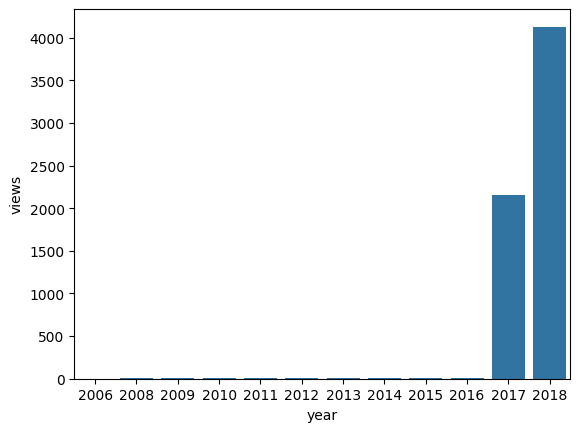

In [39]:
sns.barplot(x='year',y='views',data=video,estimator=len)

#### analyse the likes, dislikes, comment count, by any channel given by user

In [40]:
import ipywidgets as ipw

c= ipw.Dropdown(
    options=df['channel_title'].unique(),
    value='FBE',
    description='Channel Name:',
    disabled=False,
)


def piegraph(ch):
    lk = video[video['channel_title']==ch]['likes'].sum()
    dlk = video[video['channel_title']==ch]['dislikes'].sum()
    cmt = video[video['channel_title']==ch]['comment_count'].sum()    
    lst_1 = [lk, dlk,cmt]
    plt.pie(lst_1,labels=['Likes','Dislikes','Comment_Count'],autopct='%1.1f%%')
    plt.show()

In [41]:
ipw.interact(piegraph,ch=c)

interactive(children=(Dropdown(description='Channel Name:', index=49, options=('CaseyNeistat', 'LastWeekTonigh…

<function __main__.piegraph(ch)>

#### what kind of videos a new comer should make to get - <br>

a -> more views <br>
b -> more likes <br>
c -> more comments <br>

<Axes: xlabel='views', ylabel='genre'>

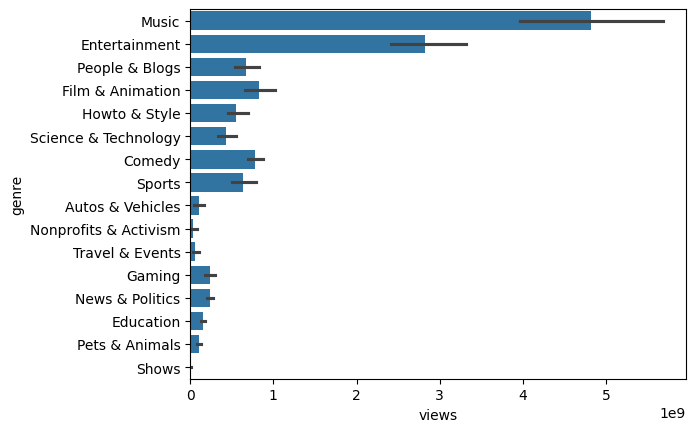

In [42]:
sns.barplot(y='genre',x='views',data=video,estimator='sum')

<Axes: xlabel='likes', ylabel='genre'>

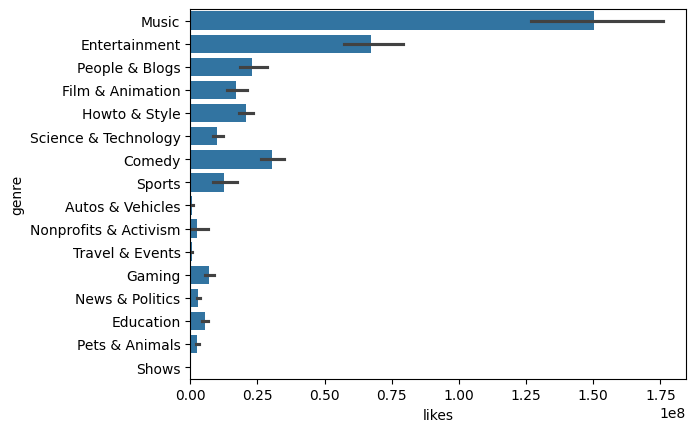

In [43]:
sns.barplot(y='genre',x='likes',data=video,estimator='sum')

<Axes: xlabel='comment_count', ylabel='genre'>

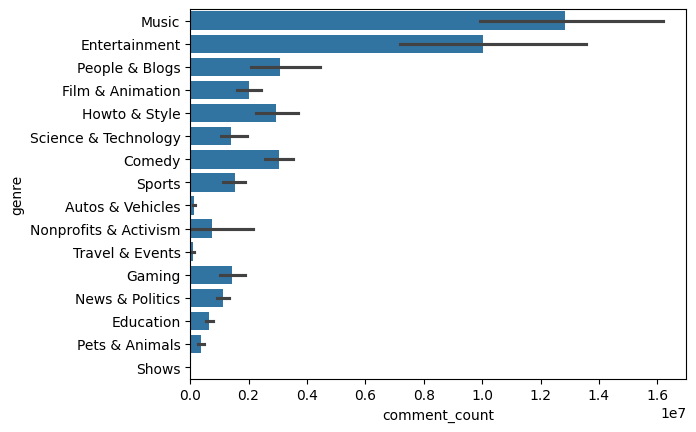

In [44]:
sns.barplot(y='genre',x='comment_count',data=video,estimator='sum')

In [45]:
video[video['genre']=='Music']['views'].sum()

4821071901

In [46]:
video[['genre','comment_count']].groupby('genre').sum().sort_values(by='comment_count',ascending=False)

,comment_count
genre,
Music,12835130
Entertainment,10034456
People & Blogs,3079756
Comedy,3039810
Howto & Style,2930361
Film & Animation,1999364
Sports,1521727
Gaming,1435141
Science & Technology,1409455


In [47]:
video[['genre','likes']].groupby('genre').max().sort_values(by='likes',ascending=False)

,likes
genre,
Music,5613827
Entertainment,3093544
People & Blogs,2032463
Nonprofits & Activism,1988746
Sports,1121217
Film & Animation,922355
Comedy,865679
Howto & Style,605954
Science & Technology,564804


In [48]:
video[['genre','views']].groupby('genre').max().sort_values(by='views',ascending=False)

,views
genre,
Music,225211923
Entertainment,149376127
People & Blogs,56111957
Film & Animation,54863912
Howto & Style,54155921
Science & Technology,42799458
Comedy,29178096
Sports,29090799
Autos & Vehicles,25244097


#### find that genre which is getting trending more fastly?

#### do the feature selection using heatmap for predition of likes (y)

<Axes: >

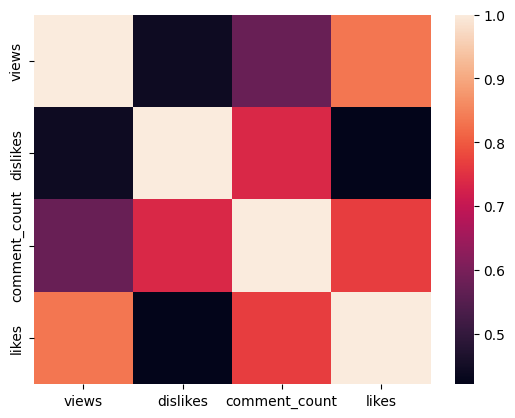

In [49]:
sns.heatmap(video[['views','dislikes', 'comment_count','likes']].corr())

In [50]:
video[['views', 'dislikes', 'comment_count','likes']].corr()

,views,dislikes,comment_count,likes
views,1.000000,0.441924,0.574890,0.834697
dislikes,0.441924,1.000000,0.737242,0.420523
comment_count,0.574890,0.737242,1.000000,0.765169
likes,0.834697,0.420523,0.765169,1.000000


# removing outliers from views, likes, dislikes

## views

<Axes: ylabel='views'>

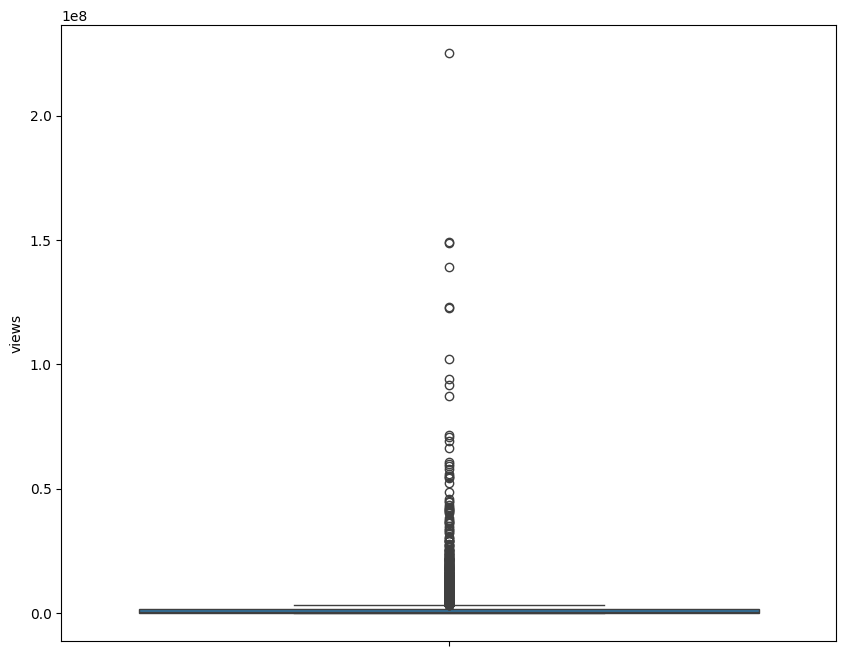

In [51]:
plt.figure(figsize=(10,8))
sns.boxplot(video['views'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_10880\2837535706.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['views'])


<Axes: xlabel='views', ylabel='Density'>

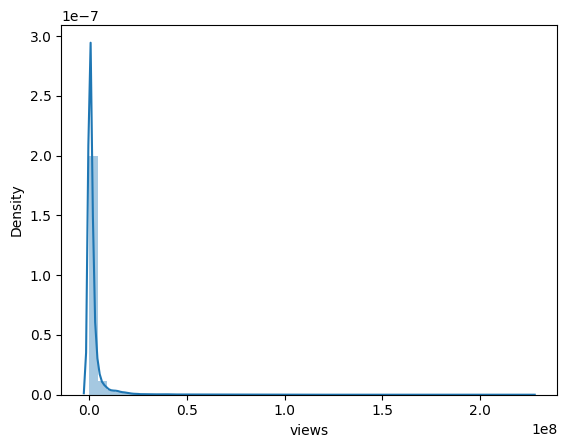

In [53]:
sns.distplot(df['views'])

## using power transformation to remove outliers

<Axes: ylabel='views'>

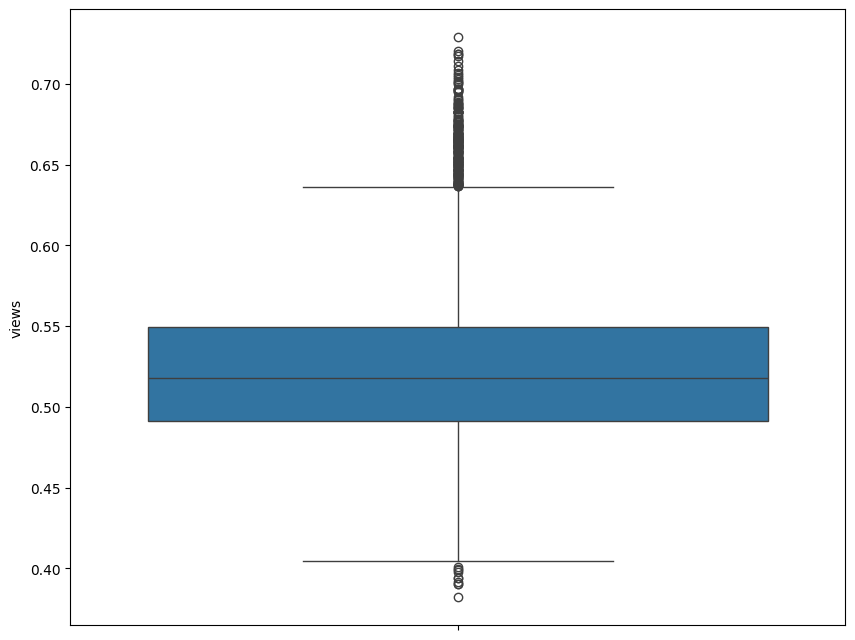

In [54]:
plt.figure(figsize=(10,8))
sns.boxplot(y=video['views'].astype(float)**(-0.05))

In [55]:
dd1 = video['views'].astype(float)**(-0.05)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10880\2284758390.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dd1)


<Axes: xlabel='views', ylabel='Density'>

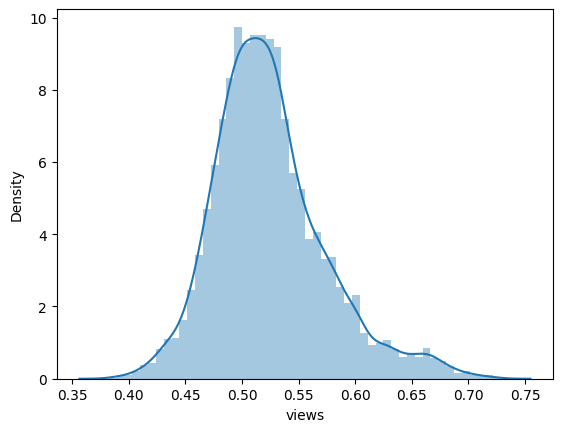

In [56]:
sns.distplot(dd1)

## Using log transformation to remove outliers

In [57]:
dd2 = np.log(video['views'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_10880\222022352.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dd2)


<Axes: xlabel='views', ylabel='Density'>

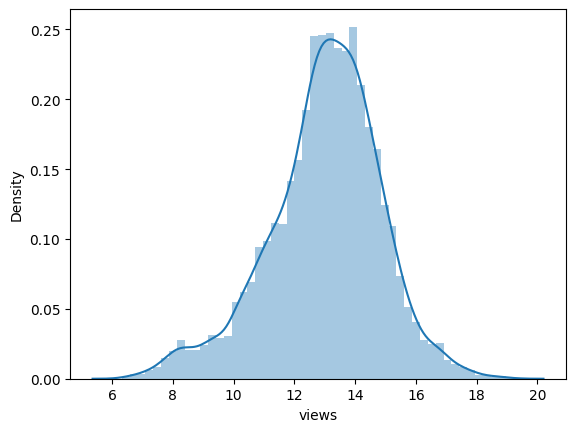

In [58]:
sns.distplot(dd2)

## Using square root transformation to remove outliers

In [59]:
dd3 = np.sqrt(video['views'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_10880\2749796876.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dd3)


<Axes: xlabel='views', ylabel='Density'>

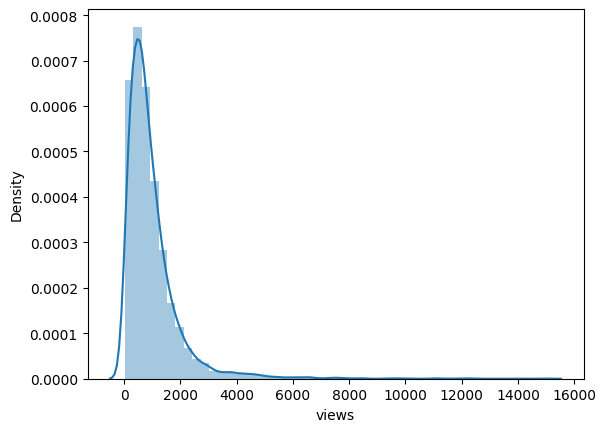

In [60]:
sns.distplot(dd3)

## likes

<Axes: ylabel='likes'>

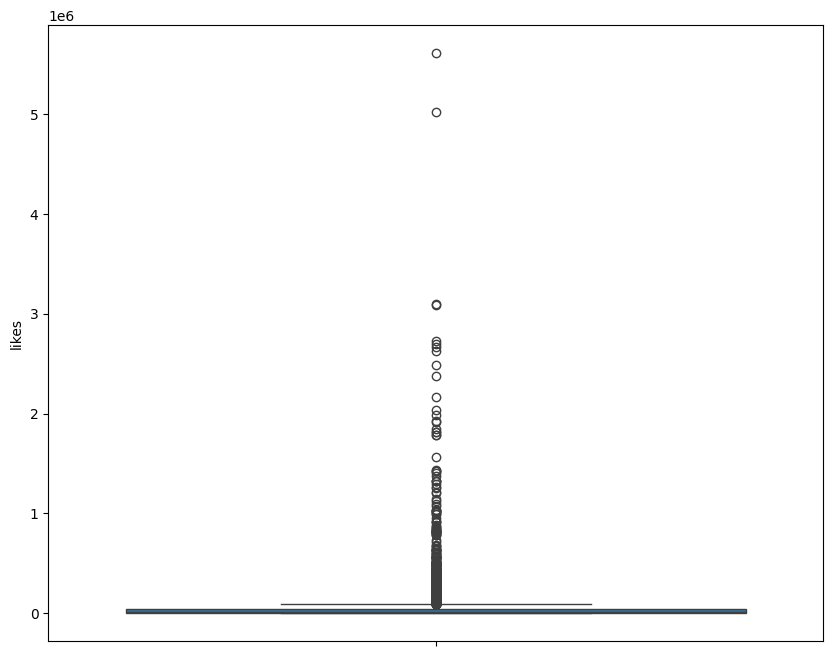

In [61]:
plt.figure(figsize=(10,8))
sns.boxplot(video['likes'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_10880\1795386738.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(video['likes'])


<Axes: xlabel='likes', ylabel='Density'>

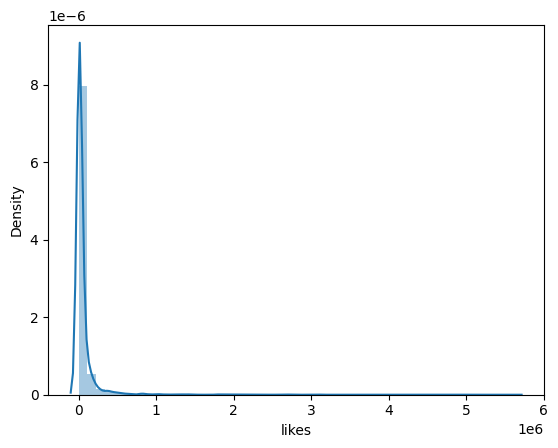

In [62]:
sns.distplot(video['likes'])

<Axes: ylabel='likes'>

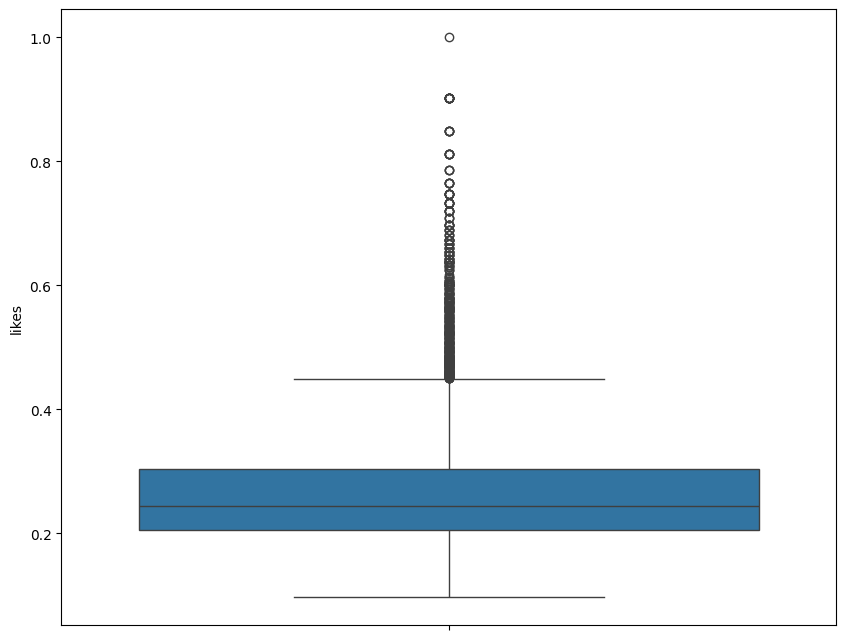

In [63]:
plt.figure(figsize=(10,8))
sns.boxplot(video['likes'].astype(float)**(-0.15))

<Axes: ylabel='dislikes'>

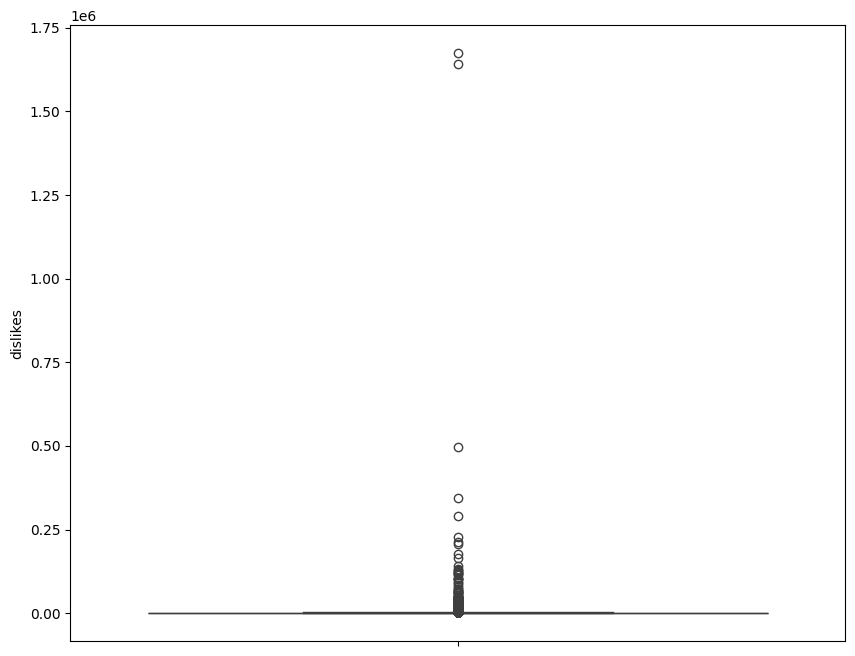

In [64]:
plt.figure(figsize=(10,8))
sns.boxplot(video['dislikes'])

In [77]:
#converting video file into csv beacause we can use for ml model

# Define the name of the CSV file
csv_file = "video.csv"
# Save the DataFrame to a CSV file
video.to_csv(csv_file, index=False)